In [1]:
import os
os.chdir("../")

In [2]:
from hebe.active_learning.simulation import active_learning_moon_simulation
from hebe.nn_models import (
    Classifier, 
    MCDropoutClassifier, 
    VadamClassifier, 
    DeepDeterministicUncertainty
)
from hebe.config import Config

In [3]:
config = Config()
model = VadamClassifier(
    config.nn_parameters,
    config.active_learning,
    config.vadam
)

# model = MCDropoutClassifier(
#     config.nn_parameters,
#     config.active_learning,
#     config.mc_dropout
# )

# model = DeepDeterministicUncertainty(
#     config.nn_parameters,
#     config.active_learning,
# )

/Users/marko.sahan/Documents/Git/hebe/hebe/nn_models/vadam/vadam_optimizer.py:124: UserWarning: This overload of addcdiv_ is deprecated:
	addcdiv_(Number value, Tensor tensor1, Tensor tensor2)
Consider using one of the following signatures instead:
	addcdiv_(Tensor tensor1, Tensor tensor2, *, Number value) (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/python_arg_parser.cpp:1485.)
  p.data.addcdiv_(


First loss: 0.6791177988052368
Last loss: 0.5599574446678162


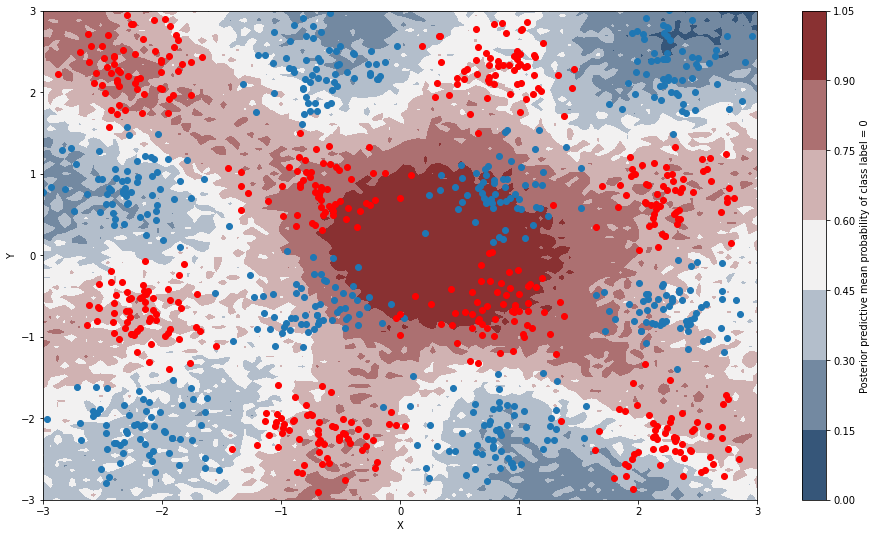

Iteration 0 if finished with AUC = 0.725 ... 

First loss: 0.47592461109161377
Last loss: 0.4080123007297516


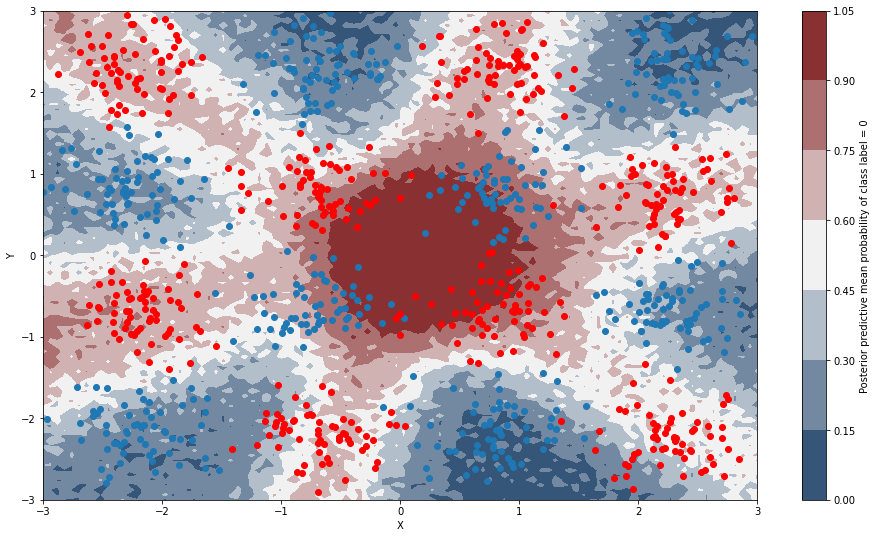

Iteration 1 if finished with AUC = 0.755 ... 

First loss: 0.5028650164604187
Last loss: 0.4141036570072174


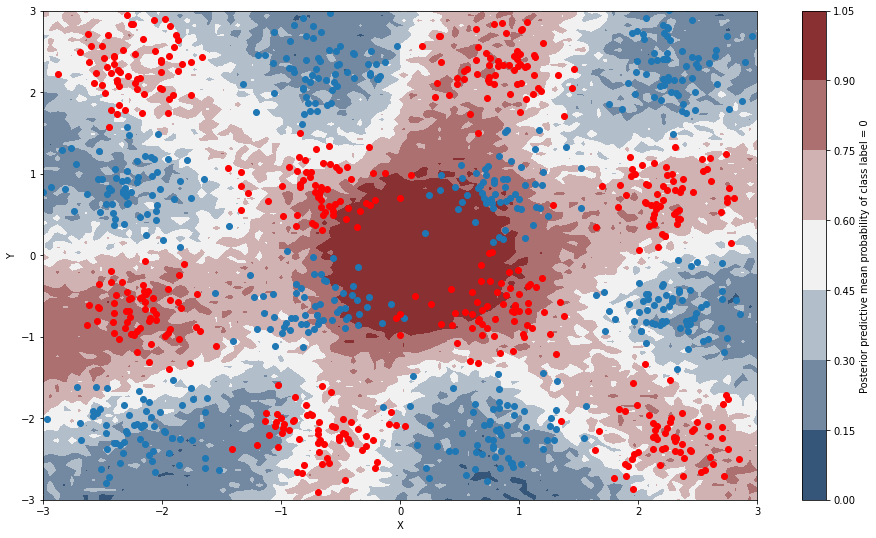

Iteration 2 if finished with AUC = 0.758 ... 

First loss: 0.5056321620941162
Last loss: 0.5108329057693481


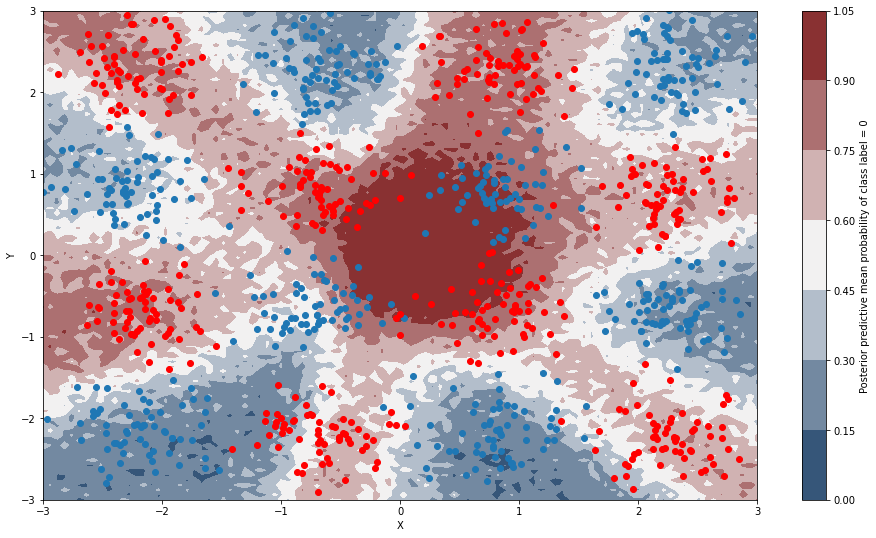

Iteration 3 if finished with AUC = 0.788 ... 

First loss: 0.49763375520706177
Last loss: 0.450190007686615


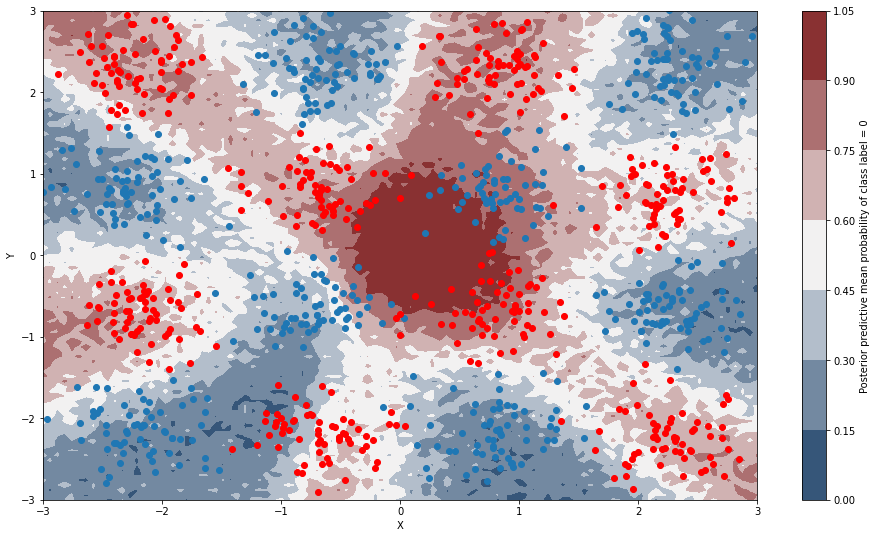

Iteration 4 if finished with AUC = 0.805 ... 

First loss: 0.5692321062088013
Last loss: 0.7478364706039429


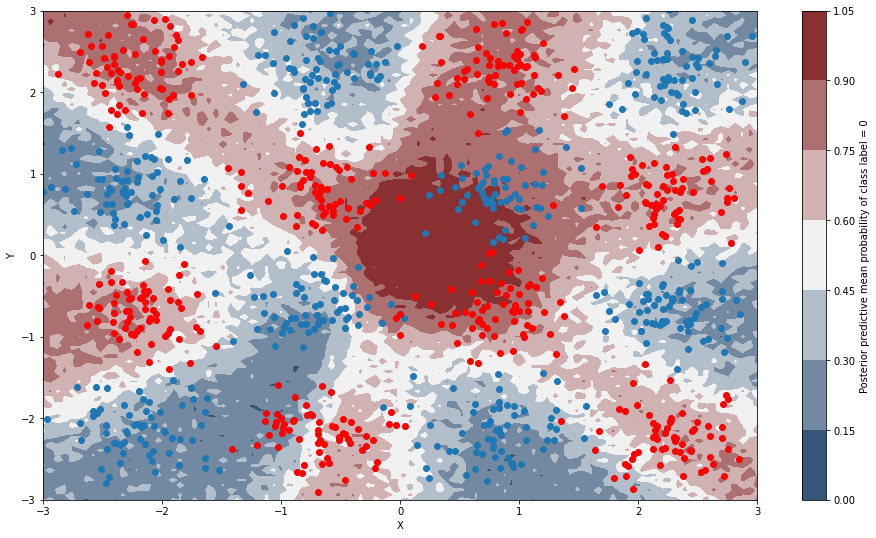

Iteration 5 if finished with AUC = 0.806 ... 

First loss: 0.5400741100311279
Last loss: 0.4971352219581604


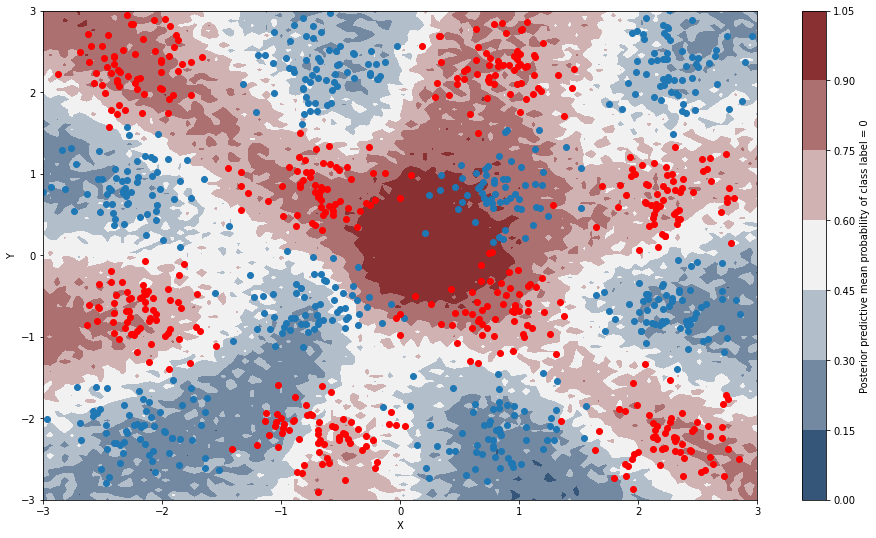

Iteration 6 if finished with AUC = 0.824 ... 

First loss: 0.5694859623908997
Last loss: 0.5658263564109802


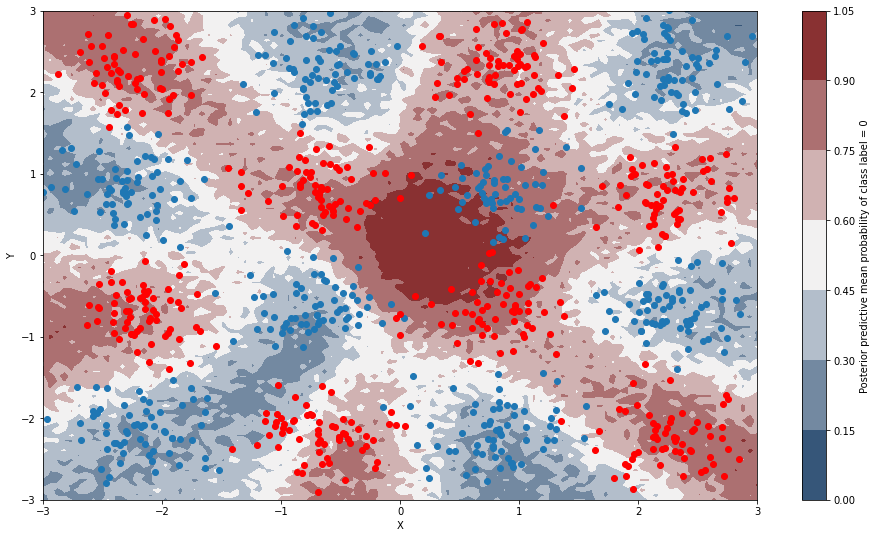

Iteration 7 if finished with AUC = 0.843 ... 

First loss: 0.5075651407241821
Last loss: 0.5404138565063477


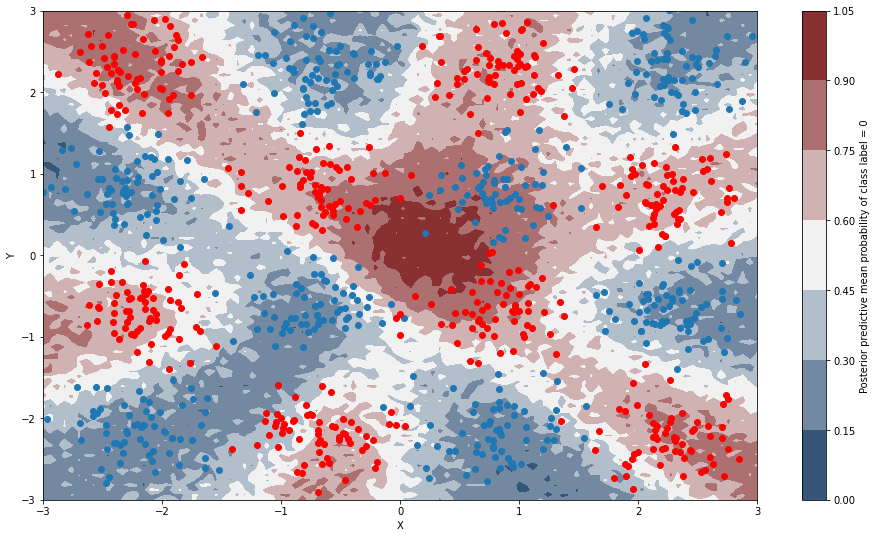

Iteration 8 if finished with AUC = 0.863 ... 

First loss: 0.500033438205719
Last loss: 0.5973608493804932


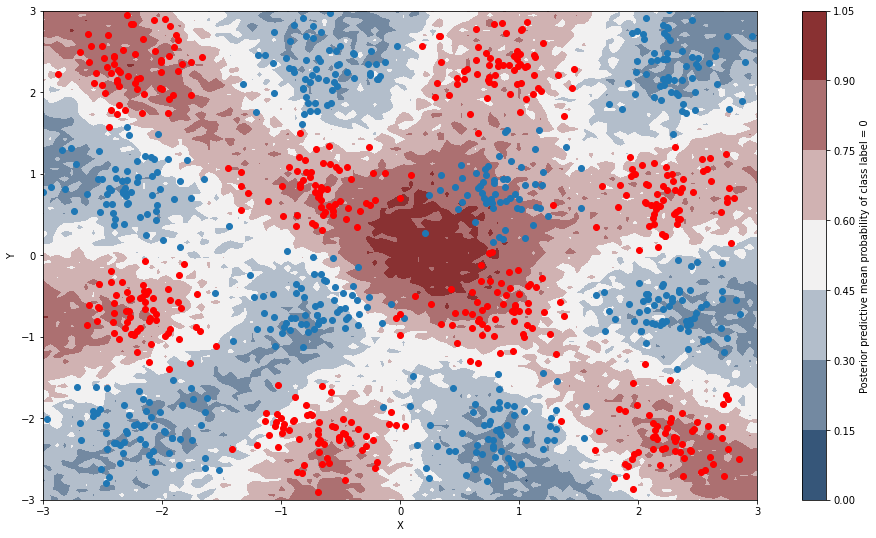

Iteration 9 if finished with AUC = 0.858 ... 

First loss: 0.537041425704956
Last loss: 0.5732122659683228


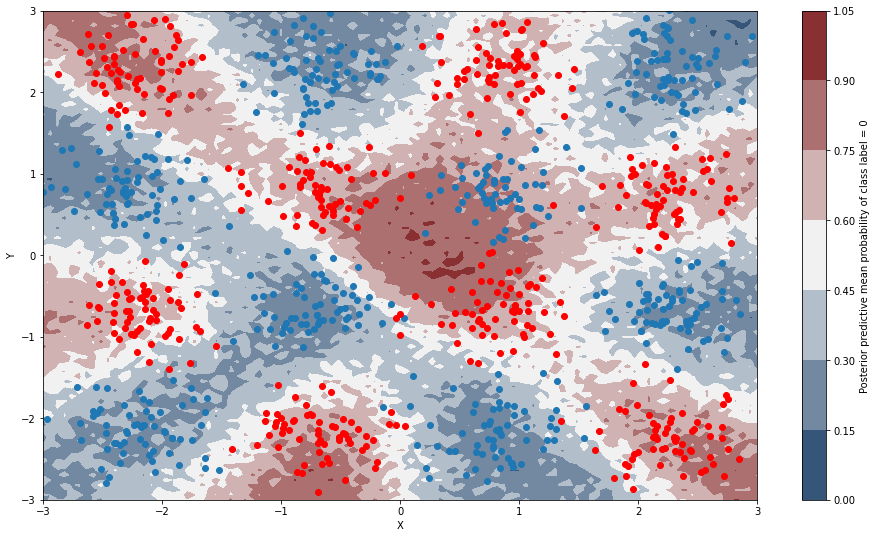

Iteration 10 if finished with AUC = 0.883 ... 

First loss: 0.5088168978691101
Last loss: 0.6188256740570068


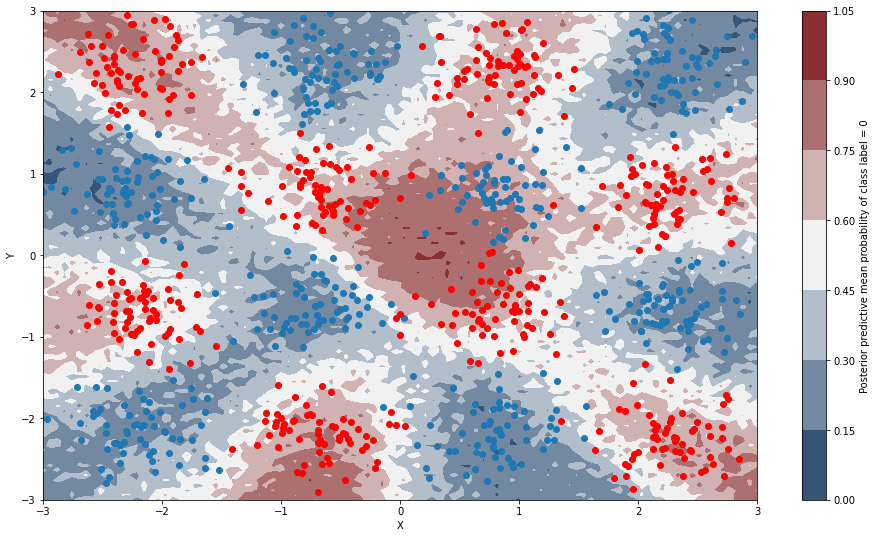

Iteration 11 if finished with AUC = 0.866 ... 

First loss: 0.5192588567733765
Last loss: 0.6423333287239075


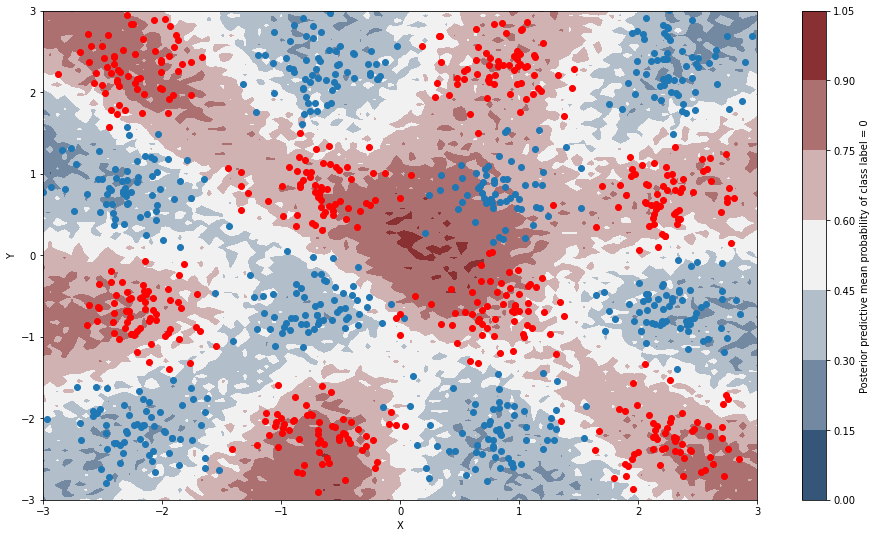

Iteration 12 if finished with AUC = 0.889 ... 

First loss: 0.5339337587356567
Last loss: 0.5936078429222107


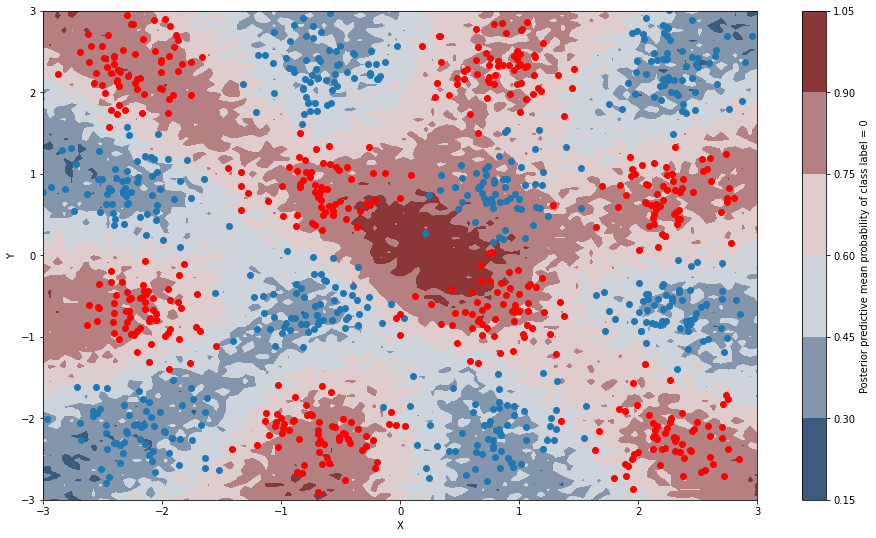

Iteration 13 if finished with AUC = 0.902 ... 

First loss: 0.5724103450775146
Last loss: 0.578883945941925


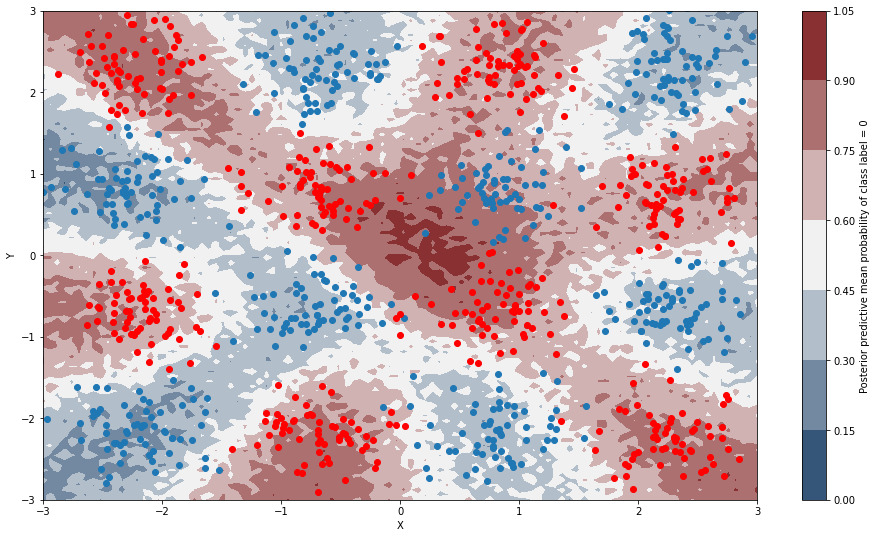

Iteration 14 if finished with AUC = 0.922 ... 

First loss: 0.697577953338623
Last loss: 0.3560805320739746


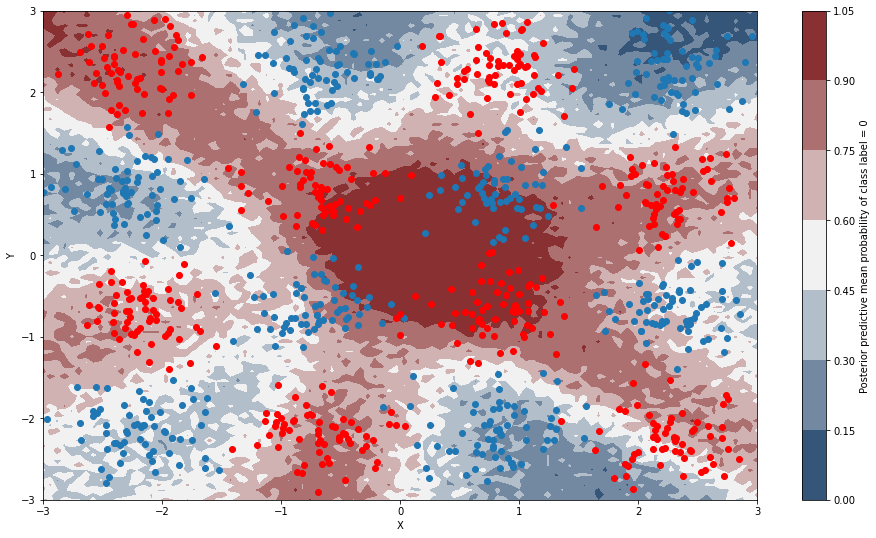

Iteration 0 if finished with AUC = 0.754 ... 

First loss: 0.5679366588592529
Last loss: 0.3309165835380554


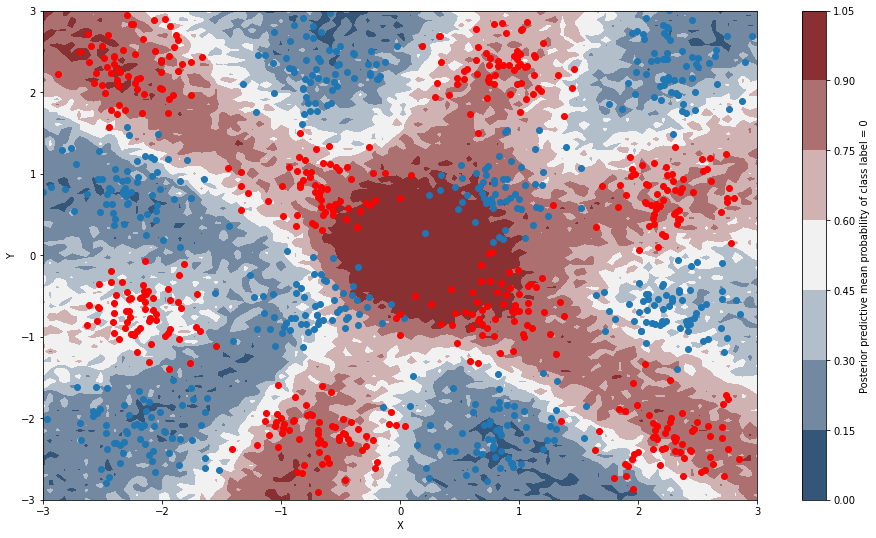

Iteration 1 if finished with AUC = 0.83 ... 

First loss: 0.44131311774253845
Last loss: 0.46135908365249634


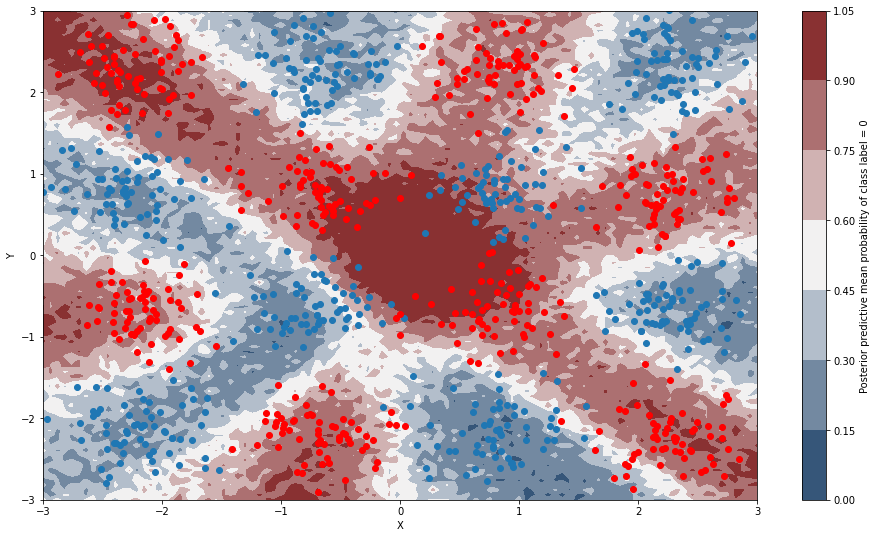

Iteration 2 if finished with AUC = 0.897 ... 

First loss: 0.47923123836517334
Last loss: 0.4412725865840912


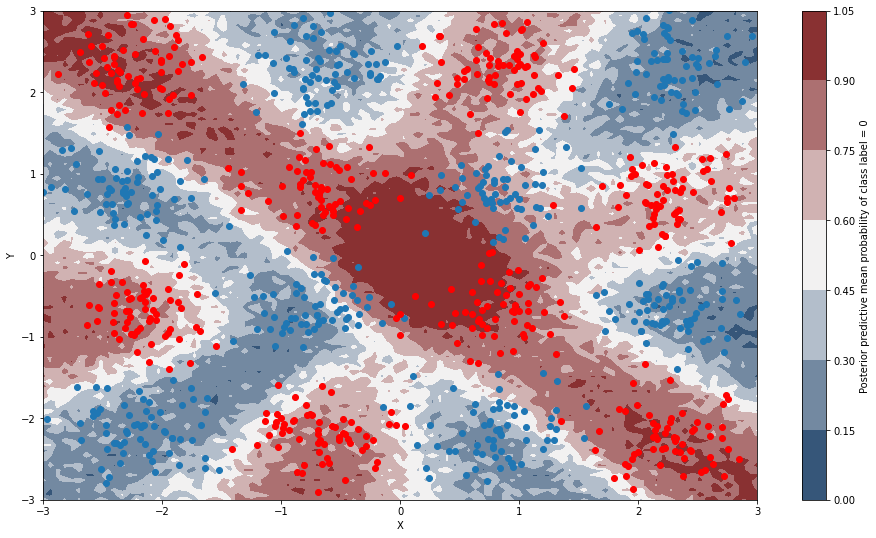

Iteration 3 if finished with AUC = 0.908 ... 

First loss: 0.5908635854721069
Last loss: 0.5980542898178101


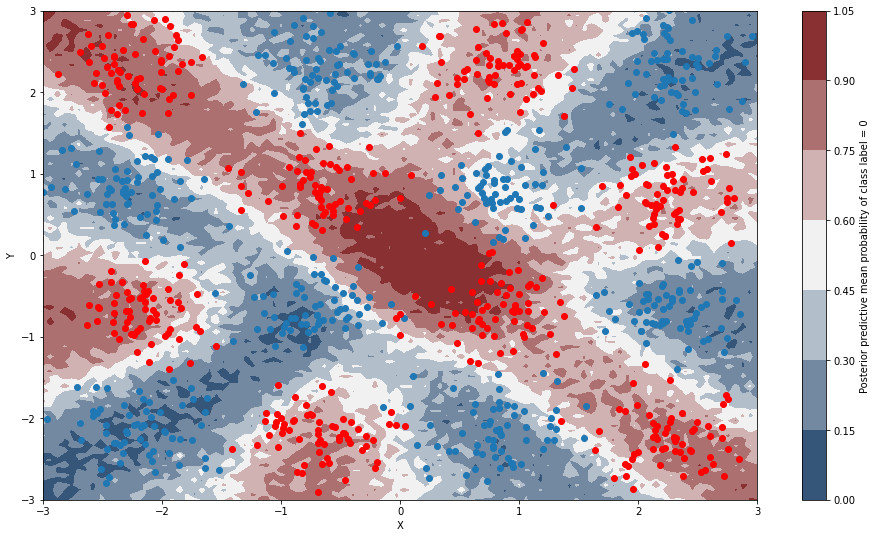

Iteration 4 if finished with AUC = 0.939 ... 

First loss: 0.5584272742271423
Last loss: 0.4589620530605316


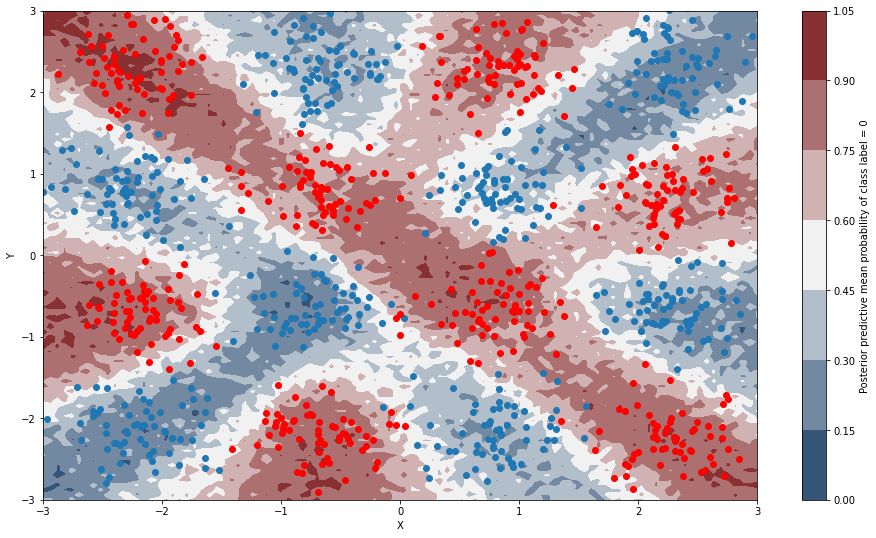

Iteration 5 if finished with AUC = 0.981 ... 

First loss: 0.46316078305244446
Last loss: 0.5046776533126831


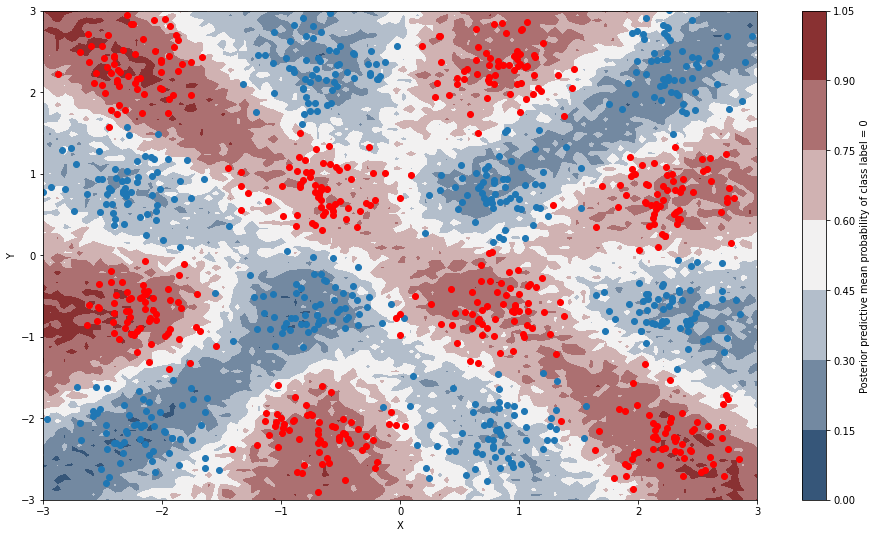

Iteration 6 if finished with AUC = 0.98 ... 

First loss: 0.540482759475708
Last loss: 0.44742220640182495


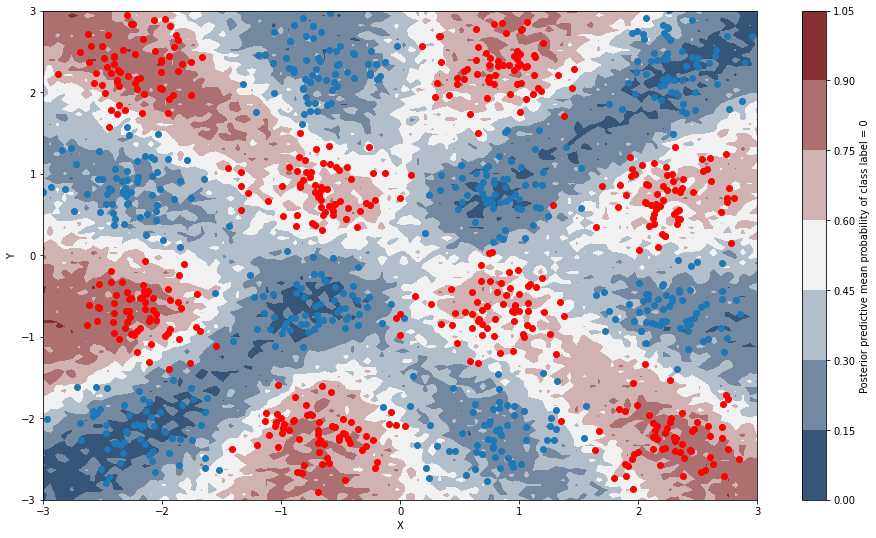

Iteration 7 if finished with AUC = 0.984 ... 

First loss: 0.4809717535972595
Last loss: 0.5432466268539429


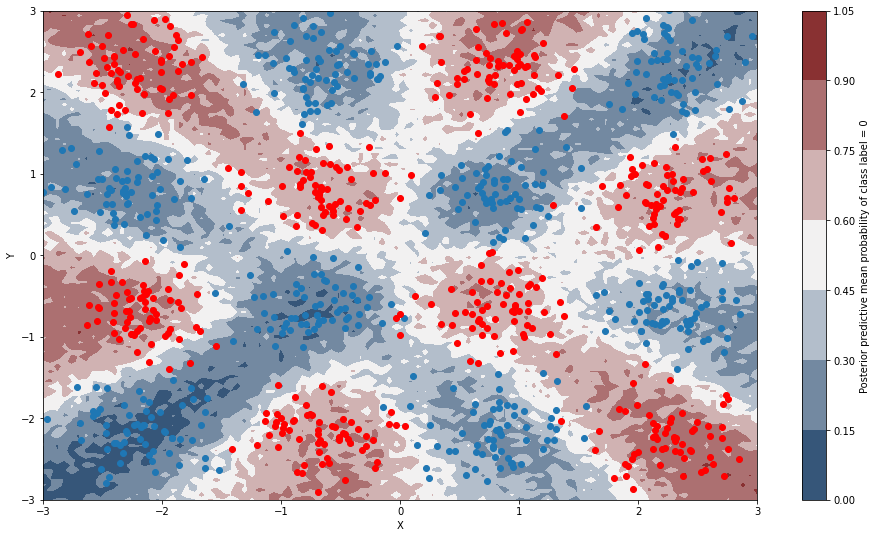

Iteration 8 if finished with AUC = 0.988 ... 

First loss: 0.5088617205619812
Last loss: 0.6486473679542542


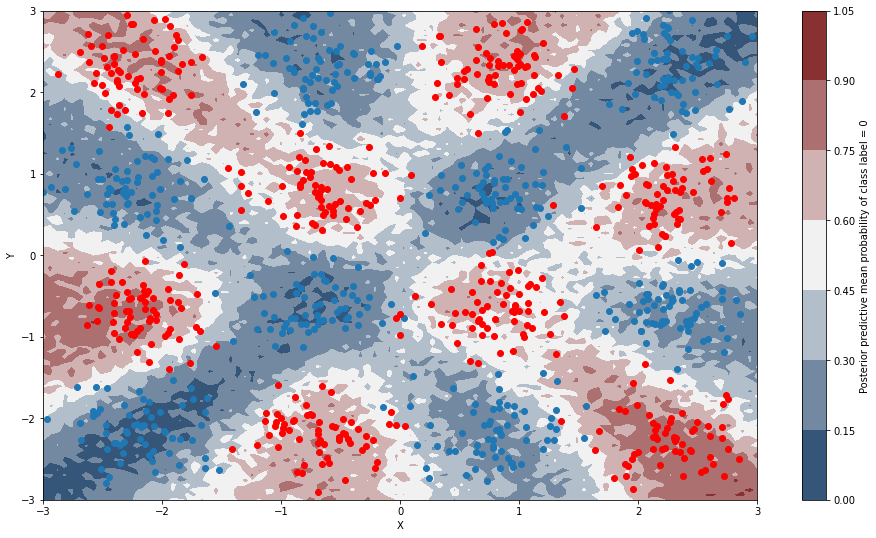

Iteration 9 if finished with AUC = 0.981 ... 

First loss: 0.5205575227737427
Last loss: 0.5525336265563965


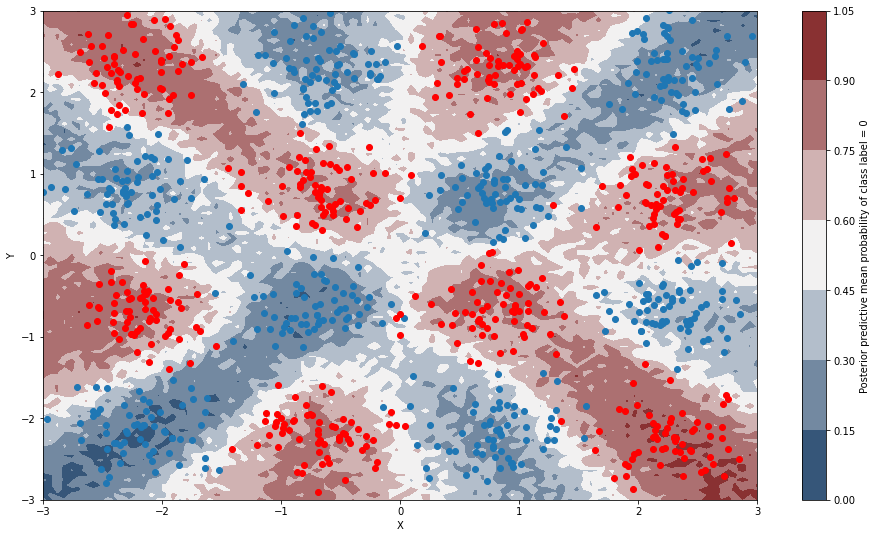

Iteration 10 if finished with AUC = 0.993 ... 

First loss: 0.49874424934387207
Last loss: 0.5293518900871277


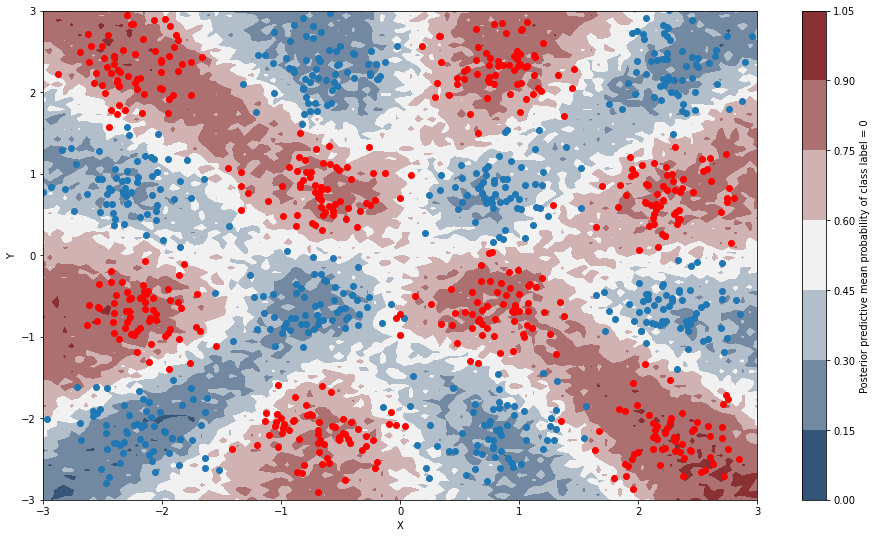

Iteration 11 if finished with AUC = 0.991 ... 

First loss: 0.5603667497634888
Last loss: 0.6056815385818481


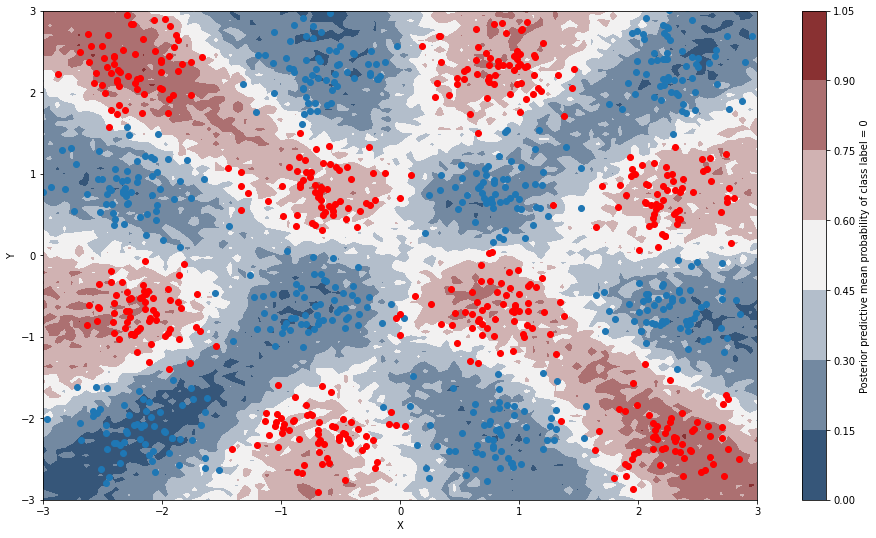

Iteration 12 if finished with AUC = 0.993 ... 

First loss: 0.5394654273986816
Last loss: 0.578006386756897


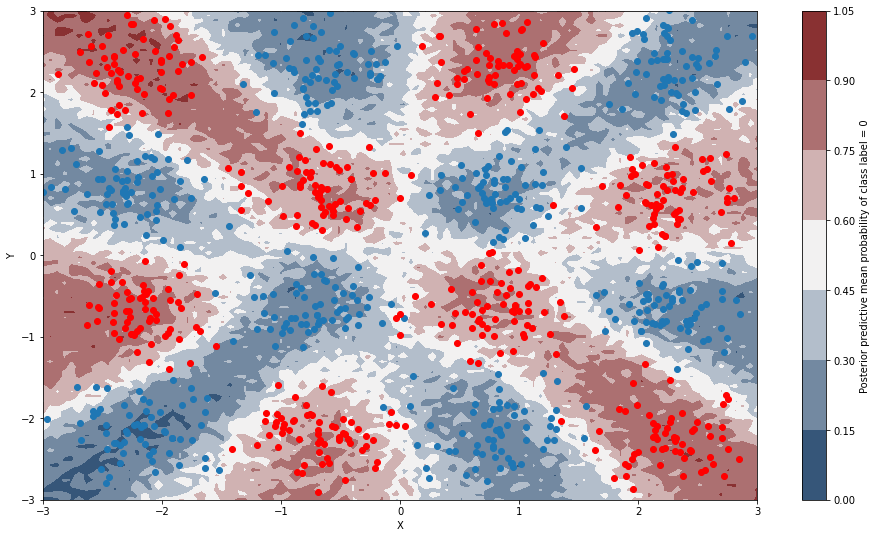

Iteration 13 if finished with AUC = 0.993 ... 

First loss: 0.5668010711669922
Last loss: 0.5389078855514526


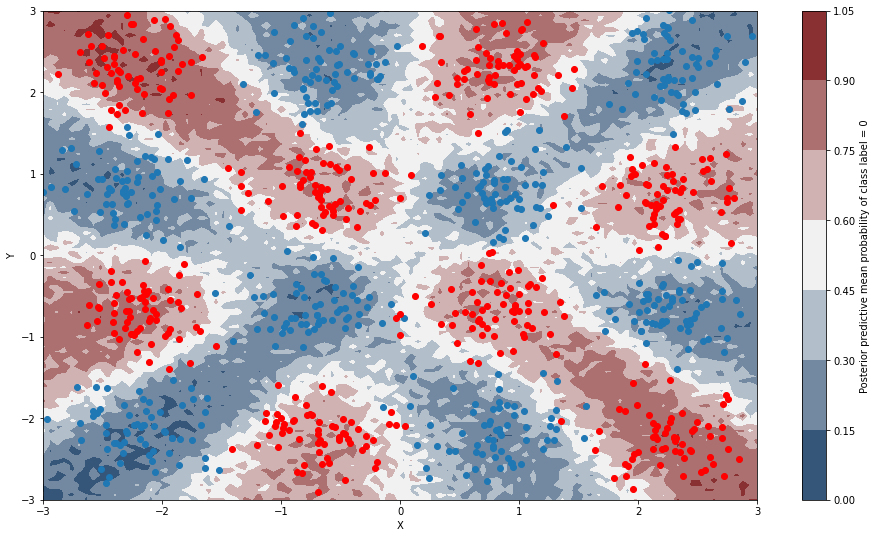

Iteration 14 if finished with AUC = 0.994 ... 



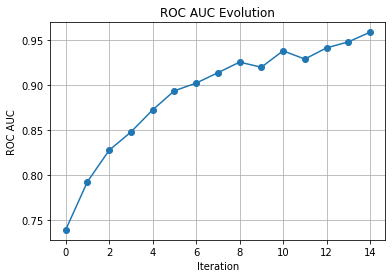

In [4]:
active_learning_moon_simulation(config.simulation, model)